In [41]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 

In [42]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [43]:
# Read city file and store in pandas DataFrame
cityDataDF = pd.read_csv(city_data_to_load)
cityDataDF.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [44]:
# Read ride file and store in pandas DataFrame
rideDataDF = pd.read_csv(ride_data_to_load)
rideDataDF.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [45]:
# Get columns and rows that are not null
cityDataDF.count()

city            120
driver_count    120
type            120
dtype: int64

In [46]:
# Double check columns and rows for null
cityDataDF.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [47]:
# Get data types of each column
cityDataDF.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [48]:
# Get unique values of type of city
cityDataDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [49]:
# Get number of data points for Urban, Suburban, Rural cities
sum(cityDataDF["type"]=="Urban")


66

In [50]:
sum(cityDataDF["type"]=="Suburban")


36

In [51]:
sum(cityDataDF["type"]=="Rural")

18

In [52]:
# Get columns and rows not null in ride data
rideDataDF.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [53]:
# Double check for null values
rideDataDF.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [54]:
# Check the types of data in ride data
rideDataDF.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [55]:
# Merge data into single dataset
pyberDataDF = pd.merge(rideDataDF, cityDataDF, how="left", on=['city', 'city'])
# Display merged dataframe
pyberDataDF.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [56]:
# Create Urban cities dataframe
urbanCitiesDF = pyberDataDF[pyberDataDF["type"]=="Urban"]
urbanCitiesDF.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [57]:
# Create Suburban and Rural city dataframes
suburbanCitiesDF = pyberDataDF[pyberDataDF["type"]=="Suburban"]
ruralCitiesDF = pyberDataDF[pyberDataDF["type"]=="Rural"]
ruralCitiesDF.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [58]:
# Get the number of rides for urban cities
urbanRideCount = urbanCitiesDF.groupby(["city"]).count()["ride_id"]
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [59]:
# Get number of ride for suburban and rural cities
suburbanRideCount = suburbanCitiesDF.groupby(["city"]).count()["ride_id"]
ruralRideCount = ruralCitiesDF.groupby(["city"]).count()["ride_id"]

In [60]:
# Get average/mean fare for each cty in urban area
urbanAvgFare = urbanCitiesDF.groupby(["city"]).mean()["fare"]
urbanAvgFare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [61]:
# Get average/mean fare for suburban and rural cities
suburbanAvgFare = suburbanCitiesDF.groupby(["city"]).mean()["fare"]
ruralAvgFare = ruralCitiesDF.groupby(["city"]).mean()["fare"]

In [62]:
# Get average/mean number drivers for each urban city
urbanDriverCount = urbanCitiesDF.groupby(["city"]).mean()["driver_count"]
urbanDriverCount.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [63]:
# Get average/mean number drivers for suburband and rural cities
suburbanDriverCount = suburbanCitiesDF.groupby(["city"]).mean()["driver_count"]
ruralDriverCount = ruralCitiesDF.groupby(["city"]).mean()["driver_count"]

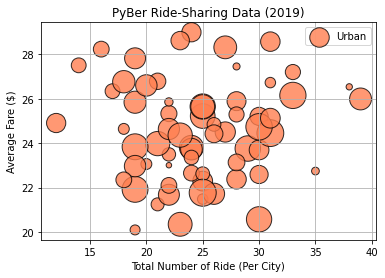

In [70]:
# Build the scatter plots for urban cities
plt.scatter(urbanRideCount,
        urbanAvgFare,
        s=urbanDriverCount*10, 
        edgecolors="black", 
        linewidths=1, 
        alpha=0.8, 
        color="coral", 
        label="Urban")
# Add title, axes lables, legend, grid
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.legend()
plt.grid(True)



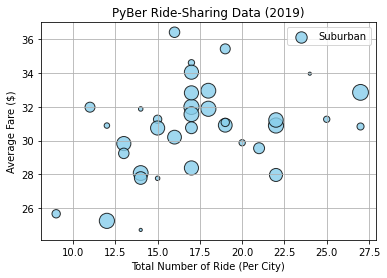

In [71]:
# Build the scatter plot for suburban cities
plt.scatter(suburbanRideCount,
        suburbanAvgFare,
        s=suburbanDriverCount*10, 
        edgecolors="black", 
        linewidths=1, 
        alpha=0.8, 
        color="skyblue", 
        label="Suburban")
# Add title, axes lables, legend, grid
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.legend()
plt.grid(True)

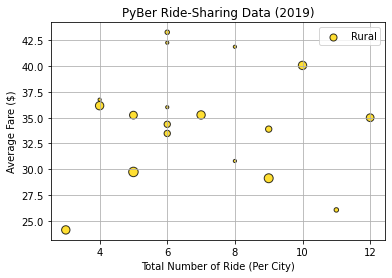

In [72]:
# Build the scatter plots for rural cities
plt.scatter(ruralRideCount,
        ruralAvgFare,
        s=ruralDriverCount*10, 
        edgecolors="black", 
        linewidths=1, 
        alpha=0.8, 
        color="gold", 
        label="Rural")
# Add title, axes lables, legend, grid
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.legend()
plt.grid(True)

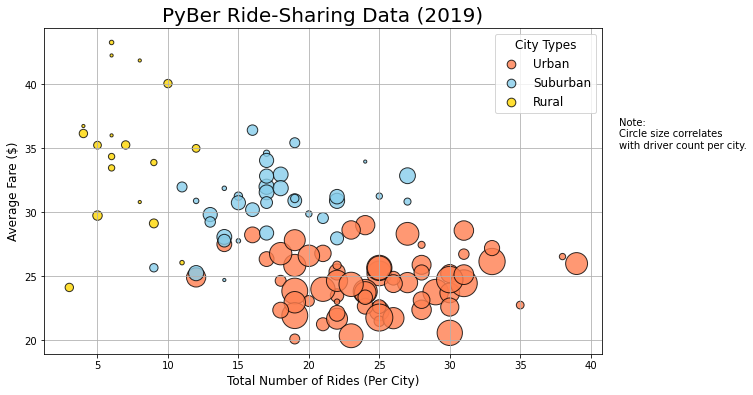

In [81]:
# Add each city type scatter plot to one cell
# Adjust size for combined total scatter plot
plt.subplots(figsize=(10,6))
# Scatter plots for urban cities
plt.scatter(urbanRideCount,
        urbanAvgFare,
        s=urbanDriverCount*10, 
        edgecolors="black", 
        linewidths=1, 
        alpha=0.8, 
        color="coral", 
        label="Urban")

# Scatter plot for suburban cities
plt.scatter(suburbanRideCount,
        suburbanAvgFare,
        s=suburbanDriverCount*10, 
        edgecolors="black", 
        linewidths=1, 
        alpha=0.8, 
        color="skyblue", 
        label="Suburban")

# Scatter plot for rural cities
plt.scatter(ruralRideCount,
        ruralAvgFare,
        s=ruralDriverCount*10, 
        edgecolors="black", 
        linewidths=1, 
        alpha=0.8, 
        color="gold", 
        label="Rural")

# Add title, axes labels, grid, legend
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Adjust legend parameters
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Create note about circle size
plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.")

# Save the figure
plt.savefig("Analysis/Fig1.png")

# Show combined plot
plt.show()